### Haberman's Survival Data Set

https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

$x_{n,1}$=age, $x_{n,2}$= year, $x_{n,3}$= number of axillary nodes

$t=1,2$ (survival, death)

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [3]:
def musig(a):    
    return (np.exp(a.T)/ sum(np.exp(a.T))).T

In [4]:
def to_binary(array):
    ar=[]
    for i in range (array.shape[0]):
        tmp=[0,0]
        ind=int(array[i])
        tmp[ind]+=1
        ar.append(tmp)
    return np.asarray(ar)

In [5]:
data=np.genfromtxt('haberman.data',delimiter=',')

In [7]:
t_raw = data[:,-1]%2
X_raw = data[:,:3]
t = to_binary(t_raw)
X = np.concatenate([X_raw,np.ones(shape=(X_raw.shape[0],1))],axis=1)

In [8]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
n_train=X_train.shape[0]
n_test=X_test.shape[0]
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(214, 4) (214, 2)
(92, 4) (92, 2)


### Set-up

$$\begin{aligned} \text{input: }&\quad \mathbf x=[x_1, \dots, x_k, 1]\\
\text{hidden layer: }& \quad  \mathbf x \mathbf w^{(1)}=[z_1, \dots , z_m]\\
 &  \phantom{LLLLLLLL}\text{with } \mathbf w^{(1)} \text{ of size } (k+1) \times m\\
& \quad \mathbf h=[h_1, \cdots , h_m, 1]\\ & \quad \phantom{\mathbf h} =[\sigma(z_1), \dots , \sigma(z_m), 1 ] \quad ( \sigma : \text{sigmoid})\\
\text{output: }&\quad \mathbf y=[y_1, \dots , y_s]= \pmb \sigma (\mathbf h \mathbf w^{(2)}) \quad ( \pmb \sigma : \text{softmax})\\ & \phantom{LLLLLLLL}\text{with } \mathbf w^{(2)} \text{ of size } (m+1) \times s \end{aligned}$$



### Formulas

$$ E(\mathbf w^{(1)}, \mathbf w^{(2)})= - \sum_{i=1}^s t_i \ln y_i $$

$$\nabla_{\mathbf w^{(2)}} E = \mathbf h^\top (\mathbf y- \mathbf t) $$

$$ \nabla E_{\mathbf w^{(1)}} = \mathbf x^T \ \left [ h_q(1-h_q) \sum_{j=1}^s (y_j -t_j)w_{qj}^{(2)} \right ]_{q=1, \dots , m} $$

In [9]:
k=3;m=4;s=2
w1=np.random.rand(k+1,m)*0.001; w2=np.random.rand(m+1,s)
eta=0.01
iter_num=100

In [10]:
def Er(w1,w2):
    h_o=sigmoid(X_train@w1)
    N=h_o.shape[0]
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)
    return -np.sum(t_train*np.log(y))/N

In [11]:
def gradE(w1,w2):
    h_o=sigmoid(X_train@w1)
    N=h_o.shape[0]
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)

    gw1=X_train.T@(h_o*(1-h_o)*((y-t_train)@(w2[:-1]).T))/N
    
    gw2=h.T@(y-t_train)/N
    return gw1, gw2

In [181]:
gw1, gw2=gradE(w1,w2)
print("gw1=\n", gw1[:3], "\n","gw2=\n", gw2[:3])
w1-=eta*gw1; w2-=eta*gw2
print("w1=\n", w1[:3], "\n", "w2=\n",w2[:3])
Er(w1,w2)

gw1=
 [[ 0.83752713 -0.88505183  0.06051168 -0.32325087]
 [ 1.07376948 -1.13463231  0.07758032 -0.41441161]
 [-0.07083772  0.07485172 -0.00511962  0.02733373]] 
 gw2=
 [[ 0.06885015 -0.06885015]
 [ 0.06742874 -0.06742874]
 [ 0.06791611 -0.06791611]]
w1=
 [[-7.80485925e-03  8.97350623e-03  2.54259693e-04  3.63914565e-03]
 [-9.78209657e-03  1.20041158e-02 -5.00518153e-04  4.69268636e-03]
 [ 1.05210440e-03 -5.41552178e-05  1.11467890e-04  4.37966906e-04]] 
 w2=
 [[0.60242096 0.09089115]
 [0.04015026 0.58267653]
 [0.5209497  0.48528915]]


0.5847452448247014

In [15]:
def accuracy(w1,w2,X=X_train,t=t_train):
    h_o=sigmoid(X@w1)
    N=h_o.shape[0]
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)
    t_pred=to_binary(np.argmax(y,axis=1))

    return np.sum(np.all(t_pred == t, axis=1))*100/N

In [16]:
for i in range(iter_num):
    gw1,gw2=gradE(w1,w2)
    w1-=eta*gw1; w2-=eta*gw2
    if i%10==0:
        print(i, '\t', Er(w1,w2), '\t', accuracy(w1,w2).round(2))

print(Er(w1,w2))

0 	 0.5429240761037856 	 74.3
10 	 0.5406461704506176 	 73.83
20 	 0.5385565182027905 	 73.36
30 	 0.536630096715928 	 72.9
40 	 0.5348464730792667 	 73.83
50 	 0.5331887640769802 	 74.77
60 	 0.5316428696430644 	 74.77
70 	 0.5301968992511795 	 74.77
80 	 0.5288407366545144 	 74.77
90 	 0.5275657053678886 	 74.77
0.526481327397997


In [17]:
accuracy(w1,w2,X_train,t_train)

75.23364485981308

In [18]:
accuracy(w1,w2,X_test,t_test)

73.91304347826087

# Classifying MNIST via Neural Networks
 
The **MNIST** (Modified National Institute of Standards and Technology) database is a large database of handwritten digits that is commonly used for training various image processing systems.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from random import randint

In [2]:
data_raw=np.genfromtxt('mnist.csv',skip_header=1,delimiter=',')

In [21]:
data_raw.shape

(10000, 785)

In [3]:
data=data_raw[np.random.choice(data_raw.shape[0], 1000, replace=False)]

In [23]:
data.shape # 28 x 28 = 784

(1000, 785)

In [4]:
t_raw = data[:,0]
X_raw = data[:,1:]/255

In [25]:
t_raw[:10]

array([7., 5., 6., 9., 5., 4., 9., 9., 4., 5.])

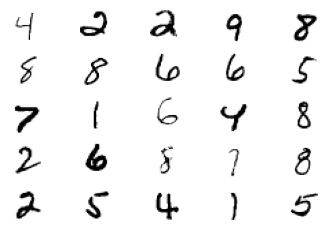

In [5]:
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    ax.axis('off')
    plt.imshow(X_raw[randint(0, X_raw.shape[0])].reshape(28,28), cmap='Greys')

In [6]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [7]:
def to_binary(array):
    ar=[]
    for i in range (array.shape[0]):
        tmp=[0,0,0,0,0,0,0,0,0,0]
        ind=int(array[i])
        tmp[ind]+=1
        ar.append(tmp)
    return np.asarray(ar)

In [8]:
t = to_binary(t_raw)
X = np.concatenate([X_raw,np.ones(shape=(X_raw.shape[0],1))],axis=1)

In [9]:
def musig(a):    
    return (np.exp(a.T)/ sum(np.exp(a.T))).T

In [10]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
n_train=X_train.shape[0]
n_test=X_test.shape[0]
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(700, 785) (700, 10)
(300, 785) (300, 10)


In [11]:
k=784;m=56;s=10
w1=np.random.rand(k+1,m)*0.00001; w2=np.random.rand(m+1,s)
eta=0.01
iter_num=5000

In [12]:
def Er(w1,w2):
    h_o=sigmoid(X_train@w1)
    N=h_o.shape[0]
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)
    return -np.sum(t_train*np.log(y))/N

In [13]:
def gradE(w1,w2):
    h_o=sigmoid(X_train@w1)
    N=h_o.shape[0]
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)

    gw1=X_train.T@(h_o*(1-h_o)*((y-t_train)@(w2[:-1]).T))/N
    
    gw2=h.T@(y-t_train)/N
    return gw1, gw2

In [14]:
def accuracy(w1,w2,X=X_train,t=t_train):
    h_o=sigmoid(X@w1)
    N=h_o.shape[0]
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)
    t_pred=to_binary(np.argmax(y,axis=1))

    return np.sum(np.all(t_pred == t, axis=1))*100/N

In [16]:
for i in range(iter_num):
    gw1,gw2=gradE(w1,w2)
    w1-=eta*gw1; w2-=eta*gw2
    if i%500==0:
        print(i, "\t", Er(w1,w2), "\t", accuracy(w1,w2).round(2))

print(Er(w1,w2))

0 	 0.3474701361560478 	 92.29
500 	 0.3244964822871846 	 93.71
1000 	 0.30412582689592316 	 94.57
1500 	 0.28586269682287924 	 95.29
2000 	 0.2693445178780446 	 95.57
2500 	 0.2542988014498873 	 95.86
3000 	 0.24051599012332206 	 96.29
3500 	 0.2278316029920852 	 96.43
4000 	 0.2161141109224378 	 96.86
4500 	 0.2052564666001118 	 97.0
0.1951895043237464


In [36]:
# Test accuracy
accuracy(w1,w2,X_test,t_test)

89.66666666666667

In [17]:
h_o=sigmoid(X_test@w1)
N=h_o.shape[0]
h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
y=musig(h@w2)
t_pred=to_binary(np.argmax(y,axis=1))

In [35]:
rd=randint(0,n_test)
plt.imshow(X_test[rd,:-1].reshape(28,28), cmap='Greys')
print('Prediction:', np.argmax(t_pred[rd]))

Prediction: 3


### TensorFlow and Keras

In [ ]:
# !conda install -c conda-forge keras --yes

In [ ]:
# !conda install -c conda-forge tensorflow --yes

In [60]:
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential

In [61]:
model = Sequential()
model.add(Dense(units=56, activation='sigmoid', input_shape=(784,)))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 56)                43960     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                570       
Total params: 44,530
Trainable params: 44,530
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
X_train_1=X_train[:,:-1]; X_test_1=X_test[:,:-1]
model.fit(X_train_1, t_train, batch_size=1, epochs=5)

Epoch 1/5
700/700 [==============================] - 1s 1ms/step - loss: 0.3761 - accuracy: 0.9157
Epoch 2/5
700/700 [==============================] - 1s 1ms/step - loss: 0.3472 - accuracy: 0.9171
Epoch 3/5
700/700 [==============================] - 1s 1ms/step - loss: 0.3235 - accuracy: 0.9314
Epoch 4/5
700/700 [==============================] - 1s 1ms/step - loss: 0.3016 - accuracy: 0.9371
Epoch 5/5
700/700 [==============================] - 1s 1ms/step - loss: 0.2790 - accuracy: 0.9414


In [66]:
loss, accuracy  = model.evaluate(X_test_1, t_test)
print(f'Test accuracy: {accuracy:.3}')

300/300 [==============================] - 0s 105us/step
Test accuracy: 0.853


### Convolutional Neural Networks (CNN)

In [394]:
import numpy as np
from sklearn.model_selection import train_test_split

In [395]:
data_raw=np.genfromtxt('mnist.csv',skip_header=1,delimiter=',')

In [396]:
data=data_raw[np.random.choice(data_raw.shape[0], 100, replace=False)]

In [397]:
t_raw = data[:,0]
X_raw = data[:,1:]

In [398]:
def relu(x):
    return np.maximum(x,0)

In [399]:
def heaviside(x):
    y=np.empty(x.shape)
    y[x>=0]=1
    y[x<0]=0
    return y

In [400]:
def musig(a):    
    return (np.exp(a.T)/ sum(np.exp(a.T))).T

In [401]:
def to_binary(array):
    ar=[]
    for i in range (array.shape[0]):
        tmp=[0,0,0,0,0,0,0,0,0,0]
        ind=int(array[i])
        tmp[ind]+=1
        ar.append(tmp)
    return np.asarray(ar)

In [402]:
t = to_binary(t_raw)
X = X_raw/255

In [403]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
n_train=X_train.shape[0]
n_test=X_test.shape[0]
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(70, 784) (70, 10)
(30, 784) (30, 10)


### Naive Approach

In [404]:
k=784; ker_size=2; m=81; s=10 # pool_size=3

In [405]:
def convolution(w,X=X_train,N=X_train.shape[0]):
    X1=X.reshape((N,28,28))
    C=np.zeros((N,27,27))
    D=np.zeros((N,9,9))
    M=np.zeros((N,9,9))
    for i in range(N):
        for j in range(27):
            for k in range(27):
                C[i,j,k]=np.sum(X1[i,j:j+2,k:k+2]*w)  # convolution
        for j in range(9):
            for k in range(9):
                C_temp=C[i,3*j:3*j+3,3*k:3*k+3]   
                D[i,j,k]=np.max(C_temp)           # pooling
                M[i,j,k]=np.argmax(C_temp)        # recording max positions   
    return D, M
    

In [406]:
def Er(w1,w1_0,w2,N=X_train.shape[0]):
    d_temp, m_temp =convolution(w1)
    d_temp=d_temp.reshape(N,m)
    h_o=relu(w1_0+d_temp)   # activaiton
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)
    return -np.sum(t_train*np.log(y))/N

In [407]:
def gradE(w1,w1_0,w2,N=X_train.shape[0]):

    d_temp, m_temp =convolution(w1)
    d_temp=d_temp.reshape(N,m)
    h_o=relu(w1_0+d_temp)   #activation
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)

    g_i=heaviside(d_temp)*((y-t_train)@(w2[:-1]).T)
    
    gw1=np.zeros((2,2))
    for p in range(2):
        for q in range(2):
            x_i=np.zeros((N,m))
            for n in range(N):
                for a in range(9):
                    for b in range(9):
                        mask=m_temp[n,a,b]
                        mt=(mask%3).astype(int); ms=((mask-mt)/3).astype(int)
                        x_i[n,9*a+b]=X_train[n,28*(3*a+ms+p)+3*b+mt+q]
            gw1[p,q]=np.sum(g_i[:]*x_i[:])/N
    gw1_0=np.sum(g_i)/N 
    
    gw2=h.T@(y-t_train)/N
    return gw1, gw1_0, gw2

In [408]:
def accuracy(w1,w1_0,w2, X=X_train,t=t_train):

    N=X.shape[0]
    d_temp, m_temp =convolution(w1,X=X,N=N)
    d_temp=d_temp.reshape(N,m)
    h_o=relu(w1_0+d_temp.reshape(N,81))
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)

    t_pred=to_binary(np.argmax(y,axis=1))

    return np.sum(np.all(t_pred == t, axis=1))*100/N

In [409]:
w1=np.random.rand(ker_size,ker_size)*0.1; w1_0=np.random.random()
w2=np.zeros((m+1,s))
eta=0.1
iter_num=100

In [410]:
for i in range(100):
    gw1,gw1_0, gw2=gradE(w1,w1_0,w2)
    w1-=eta*gw1; w1_0-=eta*gw1_0; w2-=eta*gw2
    if i%10==0:
        print(i, "\t", Er(w1, w1_0,w2), "\t", accuracy(w1,w1_0,w2).round(2))
        

print(Er(w1,w1_0, w2))

0 	 2.283134339941808 	 17.14
10 	 2.190222377085968 	 17.14
20 	 2.0557805937875693 	 31.43
30 	 1.5187713513741197 	 70.0
40 	 0.761155189191797 	 91.43
50 	 0.38403442074586946 	 100.0
60 	 0.22148614652976528 	 100.0
70 	 0.14387866113875794 	 100.0
80 	 0.10212068771632679 	 100.0
90 	 0.07716124206215659 	 100.0
0.06232864571476408


In [412]:
accuracy(w1,w1_0,w2,X_test,t_test)

70.0

In [154]:
gw1,gw1_0, gw2=gradE(w1,w1_0,w2)
print("gw1=\n", gw1, "\n","gw2=\n", gw2[:2])
w1-=eta*gw1; w1_0-=eta*gw1_0; w2-=eta*gw2
print("\n\nw1_0=\n",w1_0)
print("w1=\n", w1, "\n", "w2=\n",w2[:2])
Er(w1,w1_0,w2)

gw1=
 [[ 0.00512786  0.0001767  -0.00346096 -0.00505256 -0.00304347]
 [ 0.00152437 -0.00576942 -0.01240063 -0.01294565 -0.00651878]
 [-0.00341653 -0.01110112 -0.01590557 -0.01411237 -0.01036118]
 [-0.00828668 -0.01422503 -0.01438154 -0.01083109 -0.00782587]
 [-0.00542008 -0.00763625 -0.00931737 -0.00451247 -0.00417576]] 
 gw2=
 [[ 4.78504382e-05  1.65752496e-03  5.43277020e-04 -8.79012040e-05
  -2.99473496e-05  5.71076893e-04 -1.13764405e-03 -2.69117281e-03
   1.65613501e-03 -5.29198903e-04]
 [ 3.86390000e-04  4.59194141e-03 -2.90174265e-04 -3.03121103e-03
  -7.71356617e-04  5.22629660e-03 -2.53918827e-03 -4.02263283e-03
   1.23495587e-03 -7.85020878e-04]]


w1_0=
 0.9261603208897742
w1=
 [[-0.03382956  0.20284274  0.376845    0.49533322  0.33134655]
 [ 0.09743253  0.39337128  0.68110564  0.78842874  0.54711311]
 [ 0.28794013  0.70371018  0.89703781  0.94678071  0.65799498]
 [ 0.43779914  0.72433319  0.92010296  0.83362247  0.56872323]
 [ 0.35867477  0.61413835  0.71366442  0.58761956 

0.20797471057049544

### Vectorization

In [413]:
data=data_raw[np.random.choice(data_raw.shape[0], 100, replace=False)]

In [414]:
t_raw = data[:,0]
X_raw = data[:,1:]

In [415]:
t = to_binary(t_raw)
X = X_raw/255

In [416]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
n_train=X_train.shape[0]
n_test=X_test.shape[0]
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(70, 784) (70, 10)
(30, 784) (30, 10)


In [417]:
#input_size=28; ker_size=2; pool_size=3; s=10
input_size=28; ker_size=3; pool_size=2; s=10

k=int(input_size**2)
c_layer_size=int(input_size-ker_size+1)
p_layer_size=int(c_layer_size/pool_size)
m=int(p_layer_size**2)

k,m,c_layer_size, p_layer_size

(784, 169, 26, 13)

In [418]:
# indexing for convolution

i0=np.repeat(np.arange(ker_size),ker_size)
i1=np.repeat(np.arange(c_layer_size),c_layer_size)
j0=np.tile(np.arange(ker_size),ker_size)
j1=np.tile(np.arange(c_layer_size),c_layer_size)
i_ind=i0.reshape(-1,1)+i1.reshape(1,-1)
j_ind=j0.reshape(-1,1)+j1.reshape(1,-1)

In [419]:
i_ind

array([[ 0,  0,  0, ..., 25, 25, 25],
       [ 0,  0,  0, ..., 25, 25, 25],
       [ 0,  0,  0, ..., 25, 25, 25],
       ...,
       [ 2,  2,  2, ..., 27, 27, 27],
       [ 2,  2,  2, ..., 27, 27, 27],
       [ 2,  2,  2, ..., 27, 27, 27]])

In [420]:
j_ind

array([[ 0,  1,  2, ..., 23, 24, 25],
       [ 1,  2,  3, ..., 24, 25, 26],
       [ 2,  3,  4, ..., 25, 26, 27],
       ...,
       [ 0,  1,  2, ..., 23, 24, 25],
       [ 1,  2,  3, ..., 24, 25, 26],
       [ 2,  3,  4, ..., 25, 26, 27]])

In [421]:
N=X_train.shape[0]
X1=X_train.reshape(N,input_size,input_size)
X1[:,i_ind,j_ind].shape

(70, 9, 676)

In [422]:
# indexing for pooling

i0=np.repeat(np.arange(pool_size),pool_size)
i1=np.repeat(np.arange(p_layer_size),p_layer_size)
j0=np.tile(np.arange(pool_size),pool_size)
j1=np.tile(np.arange(p_layer_size),p_layer_size)
ci_ind=i0.reshape(-1,1)+pool_size*i1.reshape(1,-1)
cj_ind=j0.reshape(-1,1)+pool_size*j1.reshape(1,-1)

In [423]:
# indexing for locations of max

i0=np.arange(p_layer_size)
x_ind=i0.reshape(-1,1)*p_layer_size*(pool_size**2)+i0.reshape(1,-1)*pool_size
x_ind=x_ind.reshape(1,-1)

In [424]:
# indexing for repeatition of a sample

N=X_train.shape[0]
i0=np.repeat(np.arange(N),m)
N_ind=i0.reshape(N,m)

In [425]:
def convolution(w,X=X_train,N=X_train.shape[0]):
    X1=X.reshape(N,28,28)

    C=w.reshape(1,-1)@X1[:,i_ind,j_ind]   # convolution
    C=C.reshape(N,c_layer_size,c_layer_size)[:,ci_ind,cj_ind]
    D=np.max(C,axis=1)      # pooling
    M=np.argmax(C,axis=1)   # recording max positions
    return D, M
    

In [426]:
def Er(w1,w1_0,w2,N=X_train.shape[0]):
    d_temp, m_temp =convolution(w1)
    h_o=relu(w1_0+d_temp)
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)
    return -np.sum(t_train*np.log(y))/N

In [427]:
def gradE(w1,w1_0,w2,X=X_train,N=X_train.shape[0]):

    d_temp, m_temp =convolution(w1)
    h_o=relu(w1_0+d_temp)
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)
    g_i=heaviside(d_temp)*((y-t_train)@(w2[:-1]).T)
    
    mm=p_layer_size*m_temp-(p_layer_size-1)*(m_temp%pool_size)+x_ind
    X1=X.reshape(N,28,28)[:,i_ind,j_ind]
    X2=X1[N_ind,:,mm]
    gg=(g_i*X2.transpose(2,0,1)).transpose(1,0,2)

    gw1=np.sum(np.sum(gg,axis=0),axis=1)/N
    gw1=gw1.reshape(ker_size,ker_size)
    gw1_0=np.sum(g_i)/N 
    
    gw2=h.T@(y-t_train)/N
    return gw1, gw1_0, gw2

In [428]:
def accuracy(w1,w1_0,w2,X=X_train,t=t_train):

    N=X.shape[0]
    d_temp, m_temp =convolution(w1,X=X,N=N)
    h_o=relu(w1_0+d_temp.reshape(N,m))
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)

    t_pred=to_binary(np.argmax(y,axis=1))

    return np.sum(np.all(t_pred == t, axis=1))*100/N

In [429]:
w1=np.random.rand(ker_size,ker_size)*0.1; w1_0=np.random.random()
w2=np.zeros((m+1,s))
eta=0.02
iter_num=100

In [430]:
for i in range(1000):
    gw1,gw1_0, gw2=gradE(w1,w1_0,w2)
    w1-=eta*gw1; w1_0-=eta*gw1_0; w2-=eta*gw2
    if i%100==0:
        print(i, "\t", Er(w1, w1_0,w2), "\t", accuracy(w1,w1_0,w2).round(2))
        

print(i, "\t", Er(w1, w1_0,w2), "\t", accuracy(w1,w1_0,w2).round(2))

0 	 2.2731083535117618 	 18.57
100 	 0.7046482917722069 	 90.0
200 	 0.1106392776963918 	 100.0
300 	 0.04414330571572604 	 100.0
400 	 0.02524076154457263 	 100.0
500 	 0.017054904676129214 	 100.0
600 	 0.012642912687051032 	 100.0
700 	 0.009933935450053062 	 100.0
800 	 0.00812153803025887 	 100.0
900 	 0.006833249409239581 	 100.0
999 	 0.005883742190453826 	 100.0


In [431]:
accuracy(w1,w1_0,w2,X_test,t_test)

80.0

In [270]:
gw1,gw1_0, gw2=gradE(w1,w1_0,w2)
print("gw1=\n", gw1, "\n","gw2=\n", gw2[:2])
w1-=eta*gw1; w1_0-=eta*gw1_0; w2-=eta*gw2
print("\n\nw1_0=\n",w1_0)
print("w1=\n", w1, "\n", "w2=\n",w2[:2])
Er(w1,w1_0,w2)

gw1=
 [[-0.00396761 -0.00974468 -0.00660742]
 [-0.01201656 -0.01695391 -0.01157535]
 [-0.00965373 -0.01154179 -0.00842315]] 
 gw2=
 [[-9.48889485e-05  1.06955159e-04  5.48161526e-05  2.41500068e-04
   1.66491877e-04 -6.96357821e-04  7.46725381e-05 -1.94818396e-04
   8.35542445e-04 -4.93913076e-04]
 [-9.48706971e-05  1.07044261e-04 -1.62950231e-06  2.38502157e-04
   1.86851722e-04 -6.93549636e-04  1.10630213e-04 -1.94784863e-04
   8.35672505e-04 -4.93866160e-04]]


w1_0=
 0.8054825347035317
w1=
 [[0.61931343 0.84449087 0.78966384]
 [1.00311462 1.15242593 0.93733596]
 [0.87511302 0.94762545 0.78194236]] 
 w2=
 [[-0.00484874  0.02344819 -0.00643092 -0.00946739  0.00172122  0.01834991
  -0.00361165  0.01036582 -0.0362495   0.00672306]
 [-0.0048904   0.0234037  -0.00524544 -0.00908592  0.00126567  0.01811834
  -0.00426476  0.01032609 -0.03630545  0.00667815]]


0.20259543473624222

### Stochstic Gradient Descent, Batch and Epoch

In [432]:
data=data_raw[np.random.choice(data_raw.shape[0], 10000, replace=False)]

In [433]:
t_raw = data[:,0]
X_raw = data[:,1:]

In [434]:
t = to_binary(t_raw)
X = X_raw/255

In [435]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
n_train=X_train.shape[0]
n_test=X_test.shape[0]
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(7000, 784) (7000, 10)
(3000, 784) (3000, 10)


In [436]:
#input_size=28; ker_size=2; pool_size=3; s=10
input_size=28; ker_size=3; pool_size=2; s=10
#input_size=28; ker_size=5; pool_size=2; s=10

k=int(input_size**2)
c_layer_size=int(input_size-ker_size+1)
p_layer_size=int(c_layer_size/pool_size)
m=int(p_layer_size**2)

k,m,c_layer_size, p_layer_size

(784, 169, 26, 13)

In [437]:
# indexing for convolution

i0=np.repeat(np.arange(ker_size),ker_size)
i1=np.repeat(np.arange(c_layer_size),c_layer_size)
j0=np.tile(np.arange(ker_size),ker_size)
j1=np.tile(np.arange(c_layer_size),c_layer_size)
i_ind=i0.reshape(-1,1)+i1.reshape(1,-1)
j_ind=j0.reshape(-1,1)+j1.reshape(1,-1)

In [438]:
# indexing for pooling

i0=np.repeat(np.arange(pool_size),pool_size)
i1=np.repeat(np.arange(p_layer_size),p_layer_size)
j0=np.tile(np.arange(pool_size),pool_size)
j1=np.tile(np.arange(p_layer_size),p_layer_size)
ci_ind=i0.reshape(-1,1)+pool_size*i1.reshape(1,-1)
cj_ind=j0.reshape(-1,1)+pool_size*j1.reshape(1,-1)

In [439]:
# indexing for locations of max

i0=np.arange(p_layer_size)
x_ind=i0.reshape(-1,1)*p_layer_size*(pool_size**2)+i0.reshape(1,-1)*pool_size
x_ind=x_ind.reshape(1,-1)

In [440]:
def convolution(w,X=X_train,N=X_train.shape[0]):
    X1=X.reshape(N,28,28)

    C=w.reshape(1,-1)@X1[:,i_ind,j_ind]   # convolution
    C=C.reshape(N,c_layer_size,c_layer_size)[:,ci_ind,cj_ind]
    D=np.max(C,axis=1)      # pooling
    M=np.argmax(C,axis=1)
    return D, M
    

In [441]:
def Er(w1,w1_0,w2,N=X_train.shape[0]):
    d_temp, m_temp =convolution(w1)
    h_o=relu(w1_0+d_temp)
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)
    return -np.sum(t_train*np.log(y))/N

In [442]:
def gradE(w1,w1_0,w2,X=X_train,t=t_train,N=X_train.shape[0],iterations=0):
    
    batch_size=100
#    r_ind=np.random.choice(N,batch_size)    # random choice of samples
#    X=X[r_ind]; t=t[r_ind]; N=batch_size   
    N_t=int(N/batch_size)
    i_t=iterations%N_t
    r_ind=np.arange(i_t*batch_size, (i_t+1)*batch_size)
    X=X[r_ind]; t=t[r_ind]; N=batch_size
    
    d_temp, m_temp =convolution(w1,X=X,N=N)
    h_o=relu(w1_0+d_temp)
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)
    g_i=heaviside(d_temp)*((y-t)@(w2[:-1]).T)
    
    i0=np.repeat(np.arange(N),m)
    N_ind=i0.reshape(N,m)

    mm=p_layer_size*m_temp-(p_layer_size-1)*(m_temp%pool_size)+x_ind
    X1=X.reshape(N,28,28)[:,i_ind,j_ind]
    X2=X1[N_ind,:,mm]
    gg=(g_i*X2.transpose(2,0,1)).transpose(1,0,2)

    gw1=np.sum(np.sum(gg,axis=0),axis=1)/N
    gw1=gw1.reshape(ker_size,ker_size)
    gw1_0=np.sum(g_i)/N 
    
    gw2=h.T@(y-t)/N
    return gw1, gw1_0, gw2

In [443]:
def accuracy(w1,w1_0,w2,X=X_train,t=t_train):

    N=X.shape[0]
    d_temp, m_temp =convolution(w1,X=X,N=N)
    h_o=relu(w1_0+d_temp.reshape(N,m))
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)

    t_pred=to_binary(np.argmax(y,axis=1))

    return np.sum(np.all(t_pred == t, axis=1))*100/N

In [444]:
w1=np.random.rand(ker_size,ker_size)*0.1; w1_0=np.random.random()
w2=np.zeros((m+1,s))
eta=0.01
iter_num=100

In [445]:
for i in range(10000):
    gw1,gw1_0, gw2=gradE(w1,w1_0,w2,iterations=i)
    w1-=eta*gw1; w1_0-=eta*gw1_0; w2-=eta*gw2
    if i%1000==0:
        print(i, "\t", Er(w1, w1_0,w2), "\t", accuracy(w1,w1_0,w2).round(2))
        

print(Er(w1, w1_0,w2), "\t", accuracy(w1,w1_0,w2).round(2))

0 	 2.3021126026572785 	 11.27
1000 	 0.31265849071024465 	 91.1
2000 	 0.26625939257606757 	 92.13
3000 	 0.24679319661992802 	 92.87
4000 	 0.23178372541002581 	 93.14
5000 	 0.2226862784365072 	 93.24
6000 	 0.21350924586001255 	 93.46
7000 	 0.20892965190340798 	 93.83
8000 	 0.20090870741659236 	 94.03
9000 	 0.19847028429315464 	 93.9
0.19490618880240826 	 94.26


In [446]:
accuracy(w1,w1_0,w2,X_test,t_test)

91.03333333333333

### Multiple Kernels

In [447]:
data=data_raw[np.random.choice(data_raw.shape[0], 10000, replace=False)]

In [448]:
t_raw = data[:,0]
X_raw = data[:,1:]

In [449]:
t = to_binary(t_raw)
X = X_raw/255

In [469]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=12)
n_train=X_train.shape[0]
n_test=X_test.shape[0]
print(X_train.shape, t_train.shape)
print(X_test.shape, t_test.shape)

(8000, 784) (8000, 10)
(2000, 784) (2000, 10)


In [470]:
# input_size=28; ker_size=2; pool_size=3; s=10
input_size=28; ker_size=3; pool_size=2; s=10

k=int(input_size**2)
c_layer_size=int(input_size-ker_size+1)
p_layer_size=int(c_layer_size/pool_size)
m=int(p_layer_size**2)

k,m,c_layer_size, p_layer_size

(784, 169, 26, 13)

In [471]:
# indexing for convolution

i0=np.repeat(np.arange(ker_size),ker_size)
i1=np.repeat(np.arange(c_layer_size),c_layer_size)
j0=np.tile(np.arange(ker_size),ker_size)
j1=np.tile(np.arange(c_layer_size),c_layer_size)
i_ind=i0.reshape(-1,1)+i1.reshape(1,-1)
j_ind=j0.reshape(-1,1)+j1.reshape(1,-1)

In [472]:
# indexing for pooling

i0=np.repeat(np.arange(pool_size),pool_size)
i1=np.repeat(np.arange(p_layer_size),p_layer_size)
j0=np.tile(np.arange(pool_size),pool_size)
j1=np.tile(np.arange(p_layer_size),p_layer_size)
ci_ind=i0.reshape(-1,1)+pool_size*i1.reshape(1,-1)
cj_ind=j0.reshape(-1,1)+pool_size*j1.reshape(1,-1)

In [473]:
# indexing for locations of max

i0=np.arange(p_layer_size)
x_ind=i0.reshape(-1,1)*p_layer_size*(pool_size**2)+i0.reshape(1,-1)*pool_size
x_ind=x_ind.reshape(1,-1)
x_ind_c=np.tile(x_ind,2)

In [474]:
def convolution(w,X=X_train,N=X_train.shape[0]):
    nf=len(w)    # number of filters
    D=np.empty((nf,N,m))
    M=np.empty((nf,N,m))
    X1=X.reshape(N,28,28)
    for i in range(nf):
        C=w[i].reshape(1,-1)@X1[:,i_ind,j_ind]   # convolution
        C=C.reshape(N,c_layer_size,c_layer_size)[:,ci_ind,cj_ind]
        D[i]=np.max(C,axis=1)      # pooling
        M[i]=np.argmax(C,axis=1)
    return D, M
    

In [475]:
def Er(w1,w1_0,w2,N=X_train.shape[0]):
    d_temp, m_temp =convolution(w1)
    h_o=relu(w1_0[:,None,None]+d_temp).transpose(1,0,2)
    h_o=h_o.reshape(N,2*m)
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)
    return -np.sum(t_train*np.log(y))/N

In [476]:
def gradE(w1,w1_0,w2,X=X_train,t=t_train,N=X_train.shape[0],iterations=0):
    
    batch_size=100
#    r_ind=np.random.choice(N,batch_size)    # random choice of samples
#    X=X[r_ind]; t=t[r_ind]; N=batch_size   
    N_t=int(N/batch_size)
    i_t=iterations%N_t
    r_ind=np.arange(i_t*batch_size, (i_t+1)*batch_size)
    X=X[r_ind]; t=t[r_ind]; N=batch_size
    
    d_temp, m_temp =convolution(w1,X=X,N=N)
    h_o=relu(w1_0[:,None,None]+d_temp).transpose(1,0,2)
    h_o=h_o.reshape(N,2*m)
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)

    d_temp_c=(d_temp.transpose(1,0,2)).reshape(N,2*m)
    m_temp_c=(m_temp.transpose(1,0,2)).reshape(N,2*m)
    g_i=heaviside(d_temp_c)*((y-t)@(w2[:-1]).T)

    i0=np.repeat(np.arange(N),m)
    N_ind=i0.reshape(N,m)
    N_ind_c=np.tile(N_ind,2)

    mm=p_layer_size*m_temp_c-(p_layer_size-1)*(m_temp_c%pool_size)+x_ind_c
    X1=X.reshape(N,28,28)[:,i_ind,j_ind]
    X2=X1[N_ind_c,:,mm.astype(int)].transpose(0,2,1)
    gg=(g_i*X2.transpose(1,0,2)).transpose(1,0,2)
    gw1_0=np.sum(np.sum(gg[:,:,:m],axis=0),axis=1)/N
    gw1_1=np.sum(np.sum(gg[:,:,m:],axis=0),axis=1)/N
    gw1=np.array([gw1_0.reshape(ker_size,ker_size),gw1_1.reshape(ker_size,ker_size)])
    gw1_0=np.array([np.sum(g_i[:,:m]), np.sum(g_i[:,m:])])/N 
  
    gw2=h.T@(y-t)/N

    return gw1, gw1_0, gw2

In [477]:
def accuracy(w1,w1_0,w2,X=X_train,t=t_train):

    N=X.shape[0]
    d_temp, m_temp =convolution(w1,X=X,N=N)
    h_o=relu(w1_0[:,None,None]+d_temp).transpose(1,0,2)
    h_o=h_o.reshape(N,2*m)
    h = np.concatenate([h_o,np.ones(shape=(N,1))],axis=1)
    y=musig(h@w2)

    t_pred=to_binary(np.argmax(y,axis=1))

    return np.sum(np.all(t_pred == t, axis=1))*100/N

In [483]:
w1=np.random.rand(2,ker_size,ker_size)*0.1; w1_0=np.random.random(2)
w2=np.zeros((2*m+1,s))
eta=0.02
iter_num=100

In [484]:
for i in range(5000):
    gw1,gw1_0, gw2=gradE(w1,w1_0,w2,iterations=i)
    w1-=eta*gw1; w1_0-=eta*gw1_0; w2-=eta*gw2
    if i%500==0:
        print(i, "\t", Er(w1, w1_0,w2), "\t", accuracy(w1,w1_0,w2).round(2))
        
print(Er(w1, w1_0,w2), "\t", accuracy(w1,w1_0,w2).round(2))

0 	 2.3004127604232214 	 12.24
500 	 0.32972217677573684 	 90.38
1000 	 0.29195435559929794 	 91.42
1500 	 0.28680905110889887 	 91.38
2000 	 0.25480163058415983 	 92.54
2500 	 0.24951481180058152 	 92.62
3000 	 0.24679615906372765 	 92.95
3500 	 0.2542105870269903 	 92.18
4000 	 0.2331267458583104 	 93.12
4500 	 0.23034628435831045 	 93.24
0.22278154990520632 	 93.41


In [485]:
accuracy(w1,w1_0,w2,X_test,t_test)

92.8

### Keras

In [487]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [495]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, t_train), (x_test, t_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
t_train = keras.utils.to_categorical(t_train, num_classes)
t_test = keras.utils.to_categorical(t_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [496]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [497]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, t_train, batch_size=batch_size, epochs=epochs)

Epoch 1/5
60000/60000 [==============================] - 12s 206us/sample - loss: 0.2898 - acc: 0.9155
Epoch 2/5
60000/60000 [==============================] - 14s 233us/sample - loss: 0.0716 - acc: 0.9782
Epoch 3/5
60000/60000 [==============================] - 14s 225us/sample - loss: 0.0531 - acc: 0.9841
Epoch 4/5
60000/60000 [==============================] - 14s 226us/sample - loss: 0.0435 - acc: 0.9868
Epoch 5/5
60000/60000 [==============================] - 14s 226us/sample - loss: 0.0366 - acc: 0.9890


In [498]:
score = model.evaluate(x_test, t_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03505785530485445
Test accuracy: 0.9882
